In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [129]:
x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]

x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]
yvals2.sort()
vvv = prepare_alpha(v2k, vv2k, stat = metric)
cuttt = 0.99
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff, window = [0, 0.5])
print(fisher_exact(alpha[-2]))
print(alpha)

SignificanceResult(statistic=1.1676576776773209, pvalue=0.04779306718851099)
(0.14157274336146008, 0.23944806, [[754, 63943], [215, 21290]], [[754, 63943], [216, 21289]])


In [106]:
v2k = v[(v["SpecSup447"] > -1) & (v["SpecSup447"] <= 19)].copy()
#v2k = v2k[v2k["PhyloP447"] < 0.25]
vv2k = vv[(vv["SpecSup447"] > -1) & (vv["SpecSup447"] <= 19)].copy()
#vv2k = vv2k[vv2k["PhyloP447"] < 0.25]
x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]

x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]
yvals2.sort()
vvv = prepare_alpha(v2k, vv2k, stat = metric)
cuttt = 0.99
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff, window = [0, 0.5])
print(fisher_exact(alpha[-2]))
print(alpha)

SignificanceResult(statistic=1.2258578125185629, pvalue=1.5443278126043952e-17)
(0.18407389458124956, 0.21407376, [[6080, 491223], [2412, 238887]], [[6080, 491223], [2413, 238886]])


In [194]:
v2k = v[(v["SpecSup447"] > 20) & (v["SpecSup447"] <= 450)].copy()
#v2k = v2k[v2k["PhyloP447"] < 0.25]
vv2k = vv[(vv["SpecSup447"] > 20) & (vv["SpecSup447"] <= 450)].copy()
#vv2k = vv2k[vv2k["PhyloP447"] < 0.25]
x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]

x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]
yvals2.sort()
vvv = prepare_alpha(v2k, vv2k, stat = metric)
cuttt = 0.9
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff, window = [0, 0.5])
print(fisher_exact(alpha[-2]))
print(alpha)

SignificanceResult(statistic=0.9950439809098256, pvalue=0.0412641347415743)
(-0.004984379300008501, 0.087931044, [[980128, 8865147], [231935, 2087429]], [[980130, 8865145], [231937, 2087427]])


In [195]:
v2k = v[(v["SpecSup447"] > -1) & (v["SpecSup447"] <= 450)].copy()
#v2k = v2k[v2k["PhyloP447"] < 0.25]
vv2k = vv[(vv["SpecSup447"] > -1) & (vv["SpecSup447"] <= 450)].copy()
#vv2k = vv2k[vv2k["PhyloP447"] < 0.25]
x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]

x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]
yvals2.sort()
vvv = prepare_alpha(v2k, vv2k, stat = metric)
cuttt = 0.9
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff, window = [0, 0.5])
print(fisher_exact(alpha[-2]))
print(alpha)

SignificanceResult(statistic=0.9797565788681943, pvalue=2.8892190061159985e-18)
(-0.020663370569120487, 0.088964984, [[1015498, 9328356], [252744, 2274705]], [[1015499, 9328355], [252745, 2274704]])


SignificanceResult(statistic=1.012317387976382, pvalue=0.06914080315200768)
(0.012184212897708158, 0.061771978, [[96263, 855811], [32867, 295808]], [[96263, 855811], [32868, 295807]], <Figure size 1000x600 with 1 Axes>)


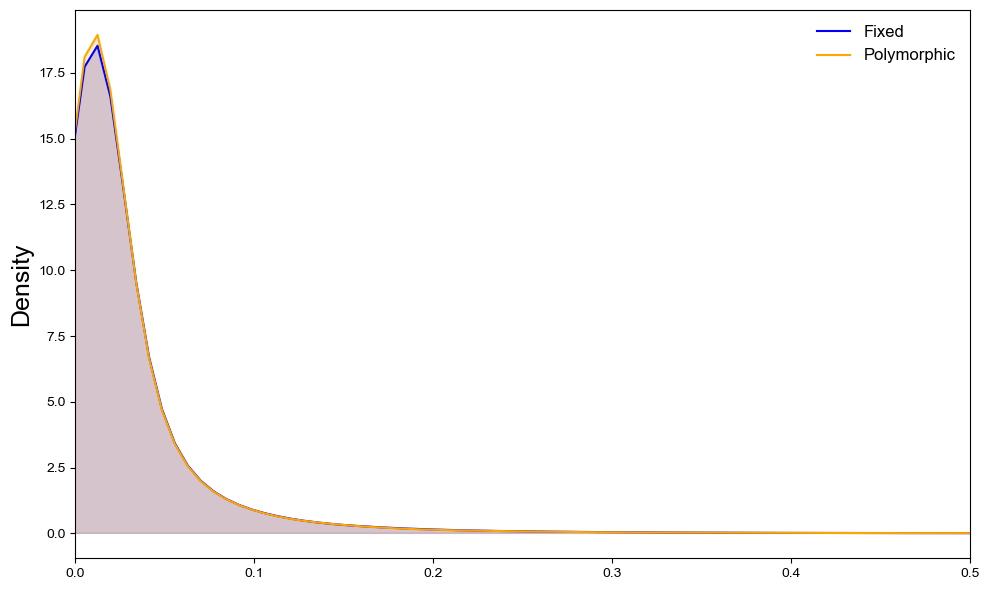

In [46]:
metric = "abs logfc"
v2k = v[(v["SpecSup447"] > 19) & (v["SpecSup447"] <= 104)].copy()
#v2k = v2k[v2k["PhyloP447"] < 0.25]
vv2k = vv[(vv["SpecSup447"] > 19) & (vv["SpecSup447"] <= 104)].copy()
#vv2k = vv2k[vv2k["PhyloP447"] < 0.25]
x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]

x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]
yvals2.sort()
vvv = prepare_alpha(v2k, vv2k, stat = metric)
cuttt = 0.9
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.5])
print(fisher_exact(alpha[-2]))
print(alpha)

SignificanceResult(statistic=0.9272139772362439, pvalue=6.260378287894152e-05)
(-0.07835669719769589, 0.061771978, [[12948, 96557], [4315, 29844]], [[12948, 96557], [4316, 29843]], <Figure size 1000x600 with 1 Axes>)


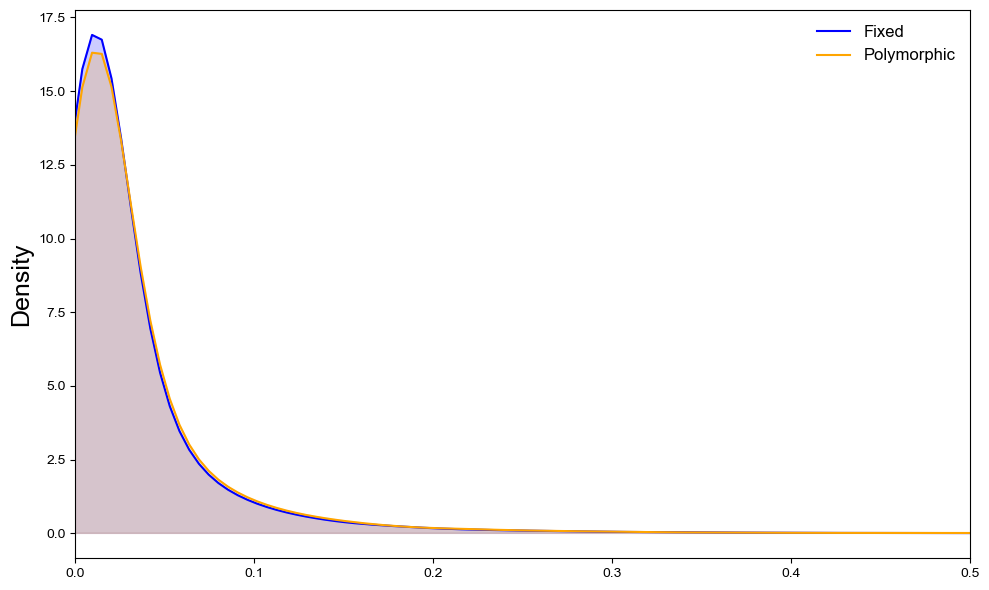

In [45]:
metric = "abs logfc"
v2k = v[(v["SpecSup447"] > 19) & (v["SpecSup447"] <= 104)].copy()
#v2k = v2k[v2k["PhyloP447"] < 0.25]
vv2k = vv[(vv["SpecSup447"] > 19) & (vv["SpecSup447"] <= 104)].copy()
#vv2k = vv2k[vv2k["PhyloP447"] < 0.25]
x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]
v2k, vv2k = remove_repeats(v2k, vv2k)
yvals2.sort()
vvv = prepare_alpha(v2k, vv2k, stat = metric)
cuttt = 0.9
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.5])
print(fisher_exact(alpha[-2]))
print(alpha)

SignificanceResult(statistic=0.945176957544812, pvalue=0.29948612074062975)


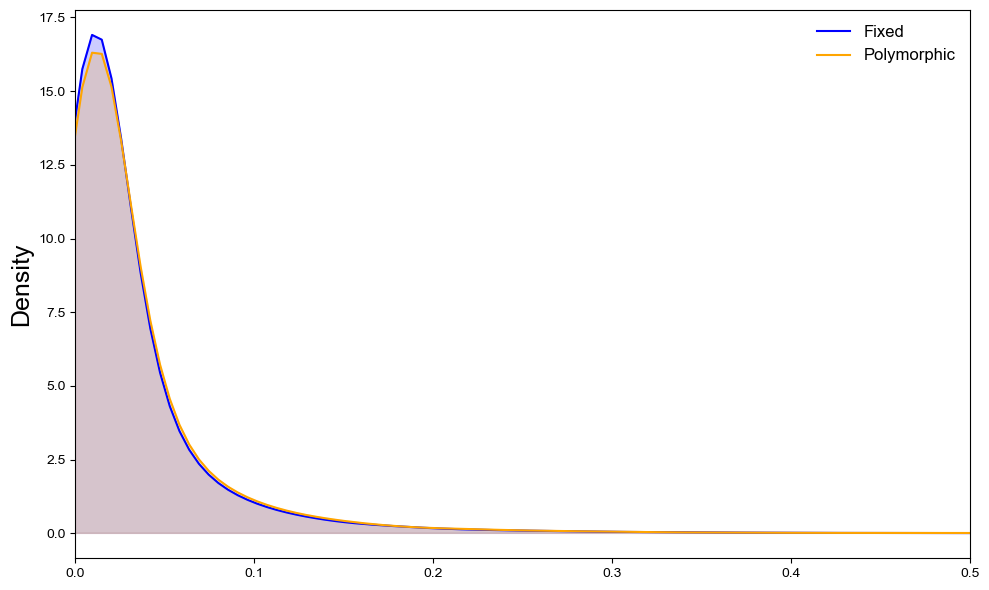

In [44]:
cuttt = 0.99
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.5])
print(fisher_exact(alpha[-2]))

In [22]:
vv2k[vv2k["abs logfc"] > cutoff].sort_values("allele1_pred_counts")

,Unnamed: 0,Position,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,FixedOrPoly
1094757,chr1:152196048,chr1:152196048,0.664537,HRNR,28145,0.083,0.005,3,0.591769,2.402367,3.620590,0.591769,Polymorphic
1094756,chr1:152196040,chr1:152196040,0.578706,HRNR,28153,0.083,0.008,3,2.366970,2.458105,12.680299,2.366970,Polymorphic
248742,chr11:5676341,chr11:5676341,0.291213,TRIM5,8672,0.082,0.042,3,1.841296,3.640579,13.045354,1.841296,Polymorphic
1799737,chr3:178862073,chr3:178862073,0.630556,ZMAT3,209707,0.077,0.358,2,1.990270,3.772081,14.986906,1.990270,Polymorphic
1261853,chr1:67548119,chr1:67548119,0.581189,SERBP1,117709,0.082,0.020,3,1.784502,4.211026,14.506967,1.784502,Polymorphic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559810,chr14:103207145,chr14:103207145,0.413140,TNFAIP2,83685,0.138,0.031,6,-0.367340,4484.283000,3476.264200,0.367340,Polymorphic
227743,chr11:3512469,chr11:3512469,0.457435,ART5,129716,0.170,0.042,6,0.412839,4595.177000,6117.572300,0.412839,Polymorphic
1048037,chr19:52821737,chr19:52821737,0.610269,ZNF28,0,0.233,0.001,17,0.475766,4609.349600,6410.022500,0.475766,Polymorphic
1048387,chr19:52942625,chr19:52942625,0.255796,ZNF816,0,0.240,0.002,19,-0.408080,8602.281000,6482.900000,0.408080,Polymorphic


In [24]:
v2k[v2k["abs logfc"] > cutoff].sort_values("logfc")

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,FixedOrPoly,MAFMaxAcrossAncestry
5204155,chr20:22044359,chr20:22044359,PAX1,338680,0.082,0.032,3,-3.216415,59.402770,6.391007,3.216415,Fixed,.
1663887,chr11:113226188,chr11:113226188,TTC12,88380,0.157,0.048,9,-2.814573,38.146652,5.422326,2.814573,Fixed,.
1315797,chr11:13824223,chr11:13824223,SPON1,138552,0.175,0.001,13,-2.677015,64.726250,10.120888,2.677015,Fixed,.
9117103,chr8:34542481,chr8:34542481,UNC5D,692981,-1.400,0.002,5,-2.500902,74.522840,13.165670,2.500902,Fixed,.
8711570,chr7:92187641,chr7:92187641,LRRD1,8489,0.063,0.017,2,-2.495801,28.558300,5.063158,2.495801,Fixed,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003274,chr2:214153226,chr2:214153226,VWC2L,257897,0.087,0.081,4,1.814024,398.410860,1400.898700,1.814024,Fixed,.
882281,chr10:22887893,chr10:22887893,ARMC3,40171,0.109,0.042,5,1.827220,28.766678,102.079310,1.827220,Fixed,.
460272,chr1:159605988,chr1:159605988,APCS,18162,-2.017,0.001,3,1.927833,18.939026,72.059800,1.927833,Fixed,.
4186123,chr19:52248287,chr19:52248287,ZNF766,21296,0.138,0.001,6,1.990121,884.445600,3513.639600,1.990121,Fixed,.


In [15]:
x = pd.read_csv("TFBS_Results/AdultProximalTubule/TFBS_SpecSup0_PS_PhastCons-1_Unpaired_MAFCut0.25_TEST_AdultProximalTubule_AbsLogfc_HrefDneCrefOnly_All.txt.gz", sep = "\t")
x[x["TF_Name"].isin(["THRB"])]

,TF_JASPAR_ID,TF_Name,Cutoff,Statistic,Median fixed abs logfc,Number fixed variants,Median polymorphic abs logfc,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff.1,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
8940,MA1574.1,THRB,300,abs logfc,0.037411,613779,0.037275,58346,5.971322e-01,0.315310,0.299269,0.157655,0.004589,0.037276,"[[307590, 306189], [29172, 29174]]","[[307590, 306189], [29173, 29173]]",0.5
8941,MA1574.1,THRB,300,abs logfc,0.037411,613779,0.037275,58346,9.471237e-01,0.315310,0.473600,0.157655,0.000627,0.051481,"[[245605, 368174], [23338, 35008]]","[[245605, 368174], [23339, 35007]]",0.6
8942,MA1574.1,THRB,300,abs logfc,0.037411,613779,0.037275,58346,3.774679e-01,0.315310,0.188629,0.157655,0.008357,0.072750,"[[185214, 428565], [17503, 40843]]","[[185214, 428565], [17504, 40842]]",0.7
8943,MA1574.1,THRB,300,abs logfc,0.037411,613779,0.037275,58346,1.173838e-01,0.315310,0.058756,0.157655,0.016847,0.109568,"[[124436, 489343], [11669, 46677]]","[[124436, 489343], [11670, 46676]]",0.8
8944,MA1574.1,THRB,300,abs logfc,0.037411,613779,0.037275,58346,1.363326e-03,0.315310,0.000686,0.157655,0.044991,0.194023,"[[63967, 549812], [5834, 52512]]","[[63967, 549812], [5835, 52511]]",0.9
8945,MA1574.1,THRB,400,abs logfc,0.049421,76002,0.047687,7313,9.107868e-02,0.007147,0.046329,0.003573,0.040630,0.047687,"[[38789, 37213], [3656, 3657]]","[[38789, 37213], [3657, 3656]]",0.5
8946,MA1574.1,THRB,400,abs logfc,0.049421,76002,0.047687,7313,2.007352e-02,0.007147,0.010190,0.003573,0.056515,0.067262,"[[31471, 44531], [2925, 4388]]","[[31471, 44531], [2926, 4387]]",0.6
8947,MA1574.1,THRB,400,abs logfc,0.049421,76002,0.047687,7313,5.401203e-03,0.007147,0.002761,0.003573,0.071465,0.099766,"[[23997, 52005], [2193, 5120]]","[[23997, 52005], [2194, 5119]]",0.7
8948,MA1574.1,THRB,400,abs logfc,0.049421,76002,0.047687,7313,1.536332e-04,0.007147,0.000076,0.003573,0.108699,0.154150,"[[16647, 59355], [1462, 5851]]","[[16647, 59355], [1463, 5850]]",0.8
8949,MA1574.1,THRB,400,abs logfc,0.049421,76002,0.047687,7313,5.564498e-03,0.007147,0.002809,0.003573,0.106120,0.294044,"[[8405, 67597], [731, 6582]]","[[8405, 67597], [732, 6581]]",0.9


In [19]:
x = pd.read_csv("Input_ZScore_TFBS_MASH_Cutoff500Proportion0.9.txt", sep = "\t").set_index("Unnamed: 0")
x.loc["MA1575.1_THRB"]

AdultHeartSmoothMuscle                2.268865
AdultHeartVentricularCardiomyocyte    0.388515
AdultLoopOfHenle                      2.048410
AdultProximalTubule                   2.962589
AMY                                   1.067375
ASCT                                  3.424944
D1Pu                                  2.323508
FetalArterialECs                     -0.754137
FetalBrainCOP                         3.874090
FetalBrainFloorPlate                  2.047889
FetalBrainNeurCB_GNP_IPC_1            2.592681
FetalBrainNeurDAergic                 2.268602
FetalBrainNeurDRG_2                   3.272538
FetalBrainNeurGlioblast_CB_VZ        -1.042189
FetalBrainNeurPurkinje_6              0.886328
FetalBrainNeurSerotonergic            1.305235
FetalBrainRoofPlate                   1.653413
FetalChondrocytes                     1.305341
FetalGonadImmuneFemale                3.169626
FetalHeartCardiacFibroblasts         -0.611728
FetalHeartEndocardium                 1.158637
FetalHeartPer

In [42]:
v2.sort_values("abs logfc")

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
10061,chr10:124587214,chr10:124587214,LHPP,125380,0.480,0.052,97,-0.000001,151.117840,151.117700,0.000001,chr10:124587214,413.0,518.0,518.0,Fixed,.,.
44891,chr22:34617081,chr22:34617081,ISX,449073,0.487,0.001,101,-0.000002,176.950880,176.950640,0.000002,chr22:34617081,468.0,518.0,518.0,Fixed,.,.
42242,chr20:14281770,chr20:14281770,FLRT3,55823,0.493,0.076,104,-0.000003,110.905900,110.905670,0.000003,chr20:14281770,494.0,518.0,518.0,Fixed,.,.
29251,chr17:42897373,chr17:42897373,G6PC,3427,-0.602,0.031,186,0.000007,73.319534,73.319885,0.000007,chr17:42897373,516.0,518.0,518.0,Fixed,.,.
24247,chr15:24850484,chr15:24850484,SNRPN,104480,0.193,0.053,19,0.000007,156.667110,156.667880,0.000007,chr15:24850484,366.0,518.0,518.0,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17671,chr12:116930221,chr12:116930221,FBXW8,19244,-0.114,0.000,256,1.432104,135.677700,366.112730,1.432104,chr12:116930221,422.0,547.0,547.0,Fixed,.,.
12022,chr11:64946256,chr11:64946256,GPHA2,10390,7.486,1.000,446,1.446853,191.620850,522.383000,1.446853,chr11:64946256,331.0,521.0,521.0,Fixed,.,.
9438,chr10:104259110,chr10:104259110,GSTO1,4574,2.071,0.399,219,1.467338,354.054750,979.001300,1.467338,chr10:104259110,350.0,544.0,544.0,Fixed,.,.
41749,chr2:237173285,chr2:237173285,COPS8,87664,-1.825,0.000,236,1.499101,140.467380,397.054140,1.499101,chr2:237173285,415.0,534.0,534.0,Fixed,.,.


In [139]:
v2.sort_values("allele1_pred_counts").tail(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
47355,chr9:87686218,chr9:87686218,CTSL,40661,-0.520,0.000,362,-0.180374,2431.7808,2145.9834,0.180374,chr9:87686218,521.0,525.0,469.0,Fixed,.,.
5184,chr10:70091115,chr10:70091115,H2AFY2,38282,0.511,0.024,432,-0.009412,2435.2173,2419.3823,0.009412,chr10:70091115,551.0,728.0,728.0,Fixed,.,.
49603,chrX:106898676,chrX:106898676,RIPPLY1,4674,-0.875,0.000,434,0.027580,2450.9927,2498.2998,0.027580,chrX:106898676,523.0,495.0,495.0,Fixed,.,.
20190,chr19:10749633,chr19:10749633,DNM2,31533,-0.123,0.001,195,1.379516,2476.3818,6443.0770,1.379516,chr19:10749633,432.0,534.0,534.0,Fixed,.,.
14321,chr15:24847764,chr15:24847764,SNRPN,107200,0.389,0.000,406,-0.019376,2623.4504,2588.4521,0.019376,chr15:24847764,387.0,520.0,520.0,Fixed,.,.
40833,chr7:2641785,chr7:2641785,TTYH3,9808,0.175,0.662,420,0.441965,2646.9387,3595.7420,0.441965,chr7:2641785,424.0,540.0,540.0,Fixed,.,.
308,chr1:16217942,chr1:16217942,ARHGEF19,10920,-1.805,0.000,380,0.068126,2671.5745,2800.7560,0.068126,chr1:16217942,456.0,515.0,515.0,Fixed,.,.
830,chr1:39954792,chr1:39954792,MFSD2A,0,0.429,0.011,433,-0.015842,2685.4224,2656.0947,0.015842,chr1:39954792,403.0,529.0,529.0,Fixed,.,.
32229,chr4:39697541,chr4:39697541,UBE2K,0,0.652,0.046,437,0.099294,2735.2349,2930.1172,0.099294,chr4:39697541,441.0,541.0,541.0,Fixed,.,.
17854,chr17:43024987,chr17:43024987,RND2,0,2.812,0.039,420,0.012520,2747.9365,2771.8867,0.012520,chr17:43024987,577.0,477.0,477.0,Fixed,.,.


In [145]:
vv2

,Position,Position.1,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,Human ref,Human alt,...,UnfoldedMAF,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,3,FixedOrPoly
213,chr10:22445159,chr10:22445159,0.496171,SPAG6,99668,0.657,0.000,320,A,G,...,0.503829,0.355463,211.30219,270.339170,0.355463,chr10:22445159,474.0,649.0,649.0,Polymorphic
670,chr11:122660866,chr11:122660866,0.427527,UBASH3B,5144,0.735,0.000,397,A,G,...,0.572473,0.081916,237.39194,251.261020,0.081916,chr11:122660866,522.0,679.0,679.0,Polymorphic
787,chr11:2299119,chr11:2299119,0.341661,C11orf21,2793,2.435,0.001,212,A,G,...,0.658339,-0.355116,330.30930,258.237980,0.355116,chr11:2299119,607.0,518.0,518.0,Polymorphic
1010,chr11:80140739,chr11:80140739,0.523278,TENM4,699851,-0.713,0.000,396,A,T,...,0.476722,0.245682,93.86878,111.295790,0.245682,chr11:80140739,728.0,541.0,541.0,Polymorphic
1089,chr11:96948675,chr11:96948675,0.622964,JRKL,558666,-4.085,0.000,185,C,G,...,0.377036,0.462837,69.75213,96.135800,0.462837,chr11:96948675,507.0,624.0,624.0,Polymorphic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10411,chr9:132790035,chr9:132790035,0.286702,AK8,88610,-0.059,0.000,288,C,A,...,0.713298,-0.152738,810.79846,729.346860,0.152738,chr9:132790035,559.0,702.0,702.0,Polymorphic
10623,chr9:80345584,chr9:80345584,0.411870,TLE4,773628,0.087,0.007,3,A,G,...,0.588130,-0.058235,64.85278,62.287117,0.058235,chr9:80345584,426.0,630.0,630.0,Polymorphic
10779,chrX:128036206,chrX:128036206,0.688288,ACTRT1,16196,0.138,0.072,6,A,G,...,0.311712,0.121834,48.91298,53.223072,0.121834,chrX:128036206,461.0,603.0,603.0,Polymorphic
10953,chrX:54002406,chrX:54002406,0.287420,PHF8,41988,0.550,0.003,432,T,C,...,0.712580,-0.582893,514.70300,343.627930,0.582893,chrX:54002406,659.0,557.0,557.0,Polymorphic


In [171]:
82/(82 + 54)

0.6029411764705882

In [177]:
binomtest(963, 860 + 963, 82/(82 + 54))

BinomTestResult(k=449, n=839, alternative='two-sided', statistic=0.5351609058402861, pvalue=0.8625724637056771)

In [182]:
fisher_exact([[140, 120], [963, 860]])

SignificanceResult(statistic=1.0418830044998268, pvalue=0.790638690547631)

In [181]:
vv2[vv2["logfc"] > 0.1].shape

(120, 22)

In [25]:
v2[v2["abs logfc"] > 0.25].sort_values("allele1_pred_counts")

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
11030,chr11:109485653,chr11:109485653,C11orf87,63479,0.028,0.012,186,0.803768,39.023903,68.122270,0.803768,chr11:109485653,284.0,507.0,507.0,Fixed,.,.
57189,chr7:117519669,chr7:117519669,CFTR,39645,0.352,0.000,253,0.280944,44.913506,54.569450,0.280944,chr7:117519669,283.0,502.0,502.0,Fixed,.,.
10641,chr11:88697313,chr11:88697313,CTSC,359560,1.126,0.000,415,0.337008,47.860287,60.453980,0.337008,chr11:88697313,504.0,554.0,521.0,Fixed,.,.
40555,chr3:69514621,chr3:69514621,FRMD4B,128434,-0.140,0.032,98,-0.457624,49.299920,35.899437,0.457624,chr3:69514621,548.0,539.0,539.0,Fixed,.,.
41007,chr3:97144015,chr3:97144015,EPHA6,329443,-0.494,0.000,217,-0.270756,50.204556,41.613815,0.270756,chr3:97144015,578.0,605.0,605.0,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59989,chr8:65743917,chr8:65743917,PDE7A,98130,0.427,0.004,196,-0.349494,2972.449700,2332.955600,0.349494,chr8:65743917,507.0,500.0,500.0,Fixed,.,.
11819,chr12:1500370,chr12:1500370,WNT5B,74286,-0.219,0.000,224,-0.364371,3304.675800,2567.096400,0.364371,chr12:1500370,288.0,666.0,666.0,Fixed,.,.
61444,chr8:139242862,chr8:139242862,COL22A1,328835,0.000,0.016,228,-0.291866,3796.184000,3100.893600,0.291866,chr8:139242862,510.0,284.0,284.0,Fixed,.,.
32206,chr2:108786678,chr2:108786678,CCDC138,0,-1.490,0.000,185,-0.288470,4384.958500,3590.271000,0.288470,chr2:108786678,519.0,530.0,515.0,Fixed,.,.


In [173]:
v2.sort_values("abs logfc")

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Dif
54350,chr22:17140798,chr22:17140798,CECR5,18425,0.112,0.000,6,0.000004,560.02844,560.03015,0.000004,chr22:17140798,540.0,451.0,451.0,Fixed,.,.,89.0
83150,chr8:63760720,chr8:63760720,YTHDF3,592124,0.585,0.001,89,0.000007,2038.40800,2038.41720,0.000007,chr8:63760720,335.0,625.0,625.0,Fixed,.,.,-290.0
55015,chr22:30365722,chr22:30365722,CCDC157,8888,-0.313,0.000,346,0.000013,702.07720,702.08344,0.000013,chr22:30365722,656.0,457.0,457.0,Fixed,.,.,199.0
45159,chr2:74495039,chr2:74495039,LBX2,8289,-0.539,0.000,241,0.000018,964.23140,964.24330,0.000018,chr2:74495039,537.0,288.0,403.0,Fixed,.,.,249.0
1632,chr1:21852864,chr1:21852864,LDLRAD2,40596,0.702,0.000,444,-0.000045,1294.61820,1294.57810,0.000045,chr1:21852864,507.0,346.0,346.0,Fixed,.,.,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19418,chr12:98292051,chr12:98292051,TMPO,223606,0.211,0.000,423,1.693706,116.57232,377.09583,1.693706,chr12:98292051,437.0,656.0,656.0,Fixed,.,.,-219.0
64734,chr4:107413661,chr4:107413661,PAPSS1,306421,0.559,0.000,72,1.764729,239.53262,813.95624,1.764729,chr4:107413661,489.0,509.0,509.0,Fixed,.,.,-20.0
64035,chr4:60744992,chr4:60744992,LPHN3,456002,5.746,1.000,440,1.778477,292.94278,1004.98035,1.778477,chr4:60744992,429.0,504.0,504.0,Fixed,.,.,-75.0
81192,chr8:4837984,chr8:4837984,CSMD1,156934,-0.370,0.000,275,-1.785902,566.29420,164.22224,1.785902,chr8:4837984,631.0,349.0,483.0,Fixed,.,.,282.0


In [196]:
v2

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
757,chr1:8379700,chr1:8379700,SLC45A1,61577,-6.651,0.000,389,0.252257,1817.45530,2164.714000,0.252257,chr1:8379700,576.0,480.0,311.0,Fixed,.,.
860,chr1:10686898,chr1:10686898,CASZ1,109723,4.890,1.000,437,0.629090,2802.44730,4334.233400,0.629090,chr1:10686898,481.0,799.0,723.0,Fixed,.,.
1238,chr1:17150244,chr1:17150244,PADI2,30792,-1.769,0.000,343,-0.596864,1198.27080,792.284360,0.596864,chr1:17150244,527.0,445.0,445.0,Fixed,.,.
1310,chr1:17719755,chr1:17719755,ACTL8,35593,-6.399,0.000,295,0.419620,1749.76320,2340.440400,0.419620,chr1:17719755,426.0,503.0,503.0,Fixed,.,.
1451,chr1:19338580,chr1:19338580,PQLC2,26279,-0.224,0.000,255,-0.399982,3980.56080,3016.739300,0.399982,chr1:19338580,527.0,266.0,266.0,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91116,chrX:101094830,chrX:101094830,CENPI,3361,0.610,0.999,440,-0.371914,907.33860,701.151700,0.371914,chrX:101094830,451.0,511.0,511.0,Fixed,.,.
91240,chrX:110018972,chrX:110018972,TMEM164,16092,0.016,0.000,383,0.374427,70.03357,90.786224,0.374427,chrX:110018972,402.0,507.0,507.0,Fixed,.,.
91301,chrX:115289711,chrX:115289711,LUZP4,0,-0.612,0.000,389,0.503210,3645.97500,5167.674000,0.503210,chrX:115289711,347.0,509.0,509.0,Fixed,.,.
91562,chrX:132949090,chrX:132949090,HS6ST2,8762,-1.241,0.000,409,-0.822979,867.54834,490.402040,0.822979,chrX:132949090,556.0,502.0,502.0,Fixed,.,.


In [212]:
x = pd.read_csv("TFBS_Results/ITL23/TFBS_SpecSup0_PS_PhastCons-1_Unpaired_MAFCut0.25_FilterNewTEs_ITL23_AbsLogfc_HrefDneCrefOnly_All.txt.gz", sep = "\t")
x[x["TF_Name"].isin(["MEF2A"])]

,TF_JASPAR_ID,TF_Name,Cutoff,Statistic,Median fixed abs logfc,Number fixed variants,Median polymorphic abs logfc,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff.1,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
435,MA0052.4,MEF2A,300,abs logfc,0.031315,558223,0.030617,47325,0.001629,0.001024,0.000819,0.000512,0.029750,0.030617,"[[283326, 274897], [23662, 23663]]","[[283326, 274897], [23663, 23662]]",0.5
436,MA0052.4,MEF2A,300,abs logfc,0.031315,558223,0.030617,47325,0.003398,0.001024,0.001716,0.000512,0.028212,0.041534,"[[227128, 331095], [18929, 28396]]","[[227128, 331095], [18930, 28395]]",0.6
437,MA0052.4,MEF2A,300,abs logfc,0.031315,558223,0.030617,47325,0.230648,0.001024,0.115240,0.000512,0.012499,0.058798,"[[168945, 389278], [14197, 33128]]","[[168945, 389278], [14198, 33127]]",0.7
438,MA0052.4,MEF2A,300,abs logfc,0.031315,558223,0.030617,47325,0.273862,0.001024,0.137009,0.000512,0.013072,0.089101,"[[112818, 445405], [9464, 37861]]","[[112819, 445404], [9465, 37860]]",0.8
439,MA0052.4,MEF2A,300,abs logfc,0.031315,558223,0.030617,47325,0.289210,0.001024,0.857101,0.000512,-0.017063,0.165052,"[[54978, 503245], [4732, 42593]]","[[54978, 503245], [4733, 42592]]",0.9
440,MA0052.4,MEF2A,400,abs logfc,0.036434,84027,0.033749,7242,0.000406,0.000068,0.000209,0.000034,0.083098,0.033751,"[[43829, 40198], [3620, 3622]]","[[43829, 40198], [3621, 3621]]",0.5
441,MA0052.4,MEF2A,400,abs logfc,0.036434,84027,0.033749,7242,0.001511,0.000068,0.000771,0.000034,0.076219,0.049024,"[[35218, 48809], [2896, 4346]]","[[35218, 48809], [2897, 4345]]",0.6
442,MA0052.4,MEF2A,400,abs logfc,0.036434,84027,0.033749,7242,0.015088,0.000068,0.007519,0.000034,0.063006,0.075213,"[[26370, 57657], [2172, 5070]]","[[26370, 57657], [2173, 5069]]",0.7
443,MA0052.4,MEF2A,400,abs logfc,0.036434,84027,0.033749,7242,0.102972,0.000068,0.051153,0.000034,0.049052,0.124370,"[[17493, 66534], [1448, 5794]]","[[17493, 66534], [1449, 5793]]",0.8
444,MA0052.4,MEF2A,400,abs logfc,0.036434,84027,0.033749,7242,0.305604,0.000068,0.154136,0.000034,0.041461,0.233711,"[[8732, 75295], [724, 6518]]","[[8732, 75295], [725, 6517]]",0.9


In [243]:
v2k = v2[(v2["abs logfc"] > 0.1) & (v2["NearestGene"].isin(syngo))]
v2k.sort_values("PhyloP447").tail(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
36079,chr2:59496695,chr2:59496695,BCL11A,1056866,1.489,0.013,181,-0.161633,109.426155,97.828320,0.161633,chr2:59496695,555.0,391.0,391.0,Fixed,.,.
27621,chr16:62115346,chr16:62115346,CDH8,78985,1.495,0.000,185,-0.221613,349.140930,299.425400,0.221613,chr16:62115346,482.0,672.0,672.0,Fixed,.,.
2291,chr1:85141791,chr1:85141791,SYDE2,59210,1.523,0.005,173,-0.344913,565.224500,445.032750,0.344913,chr1:85141791,528.0,672.0,672.0,Fixed,.,.
22559,chr14:48539412,chr14:48539412,MDGA2,864098,1.564,1.000,393,0.101629,327.008180,350.874570,0.101629,chr14:48539412,490.0,596.0,596.0,Fixed,.,.
27252,chr16:48978562,chr16:48978562,CBLN1,303254,1.572,0.001,331,-0.100711,142.082240,132.502140,0.100711,chr16:48978562,541.0,354.0,354.0,Fixed,.,.
28302,chr16:82729588,chr16:82729588,CDH13,102585,1.597,0.000,190,0.510110,229.727220,327.168030,0.510110,chr16:82729588,358.0,548.0,548.0,Fixed,.,.
51373,chr3:180850908,chr3:180850908,FXR1,61669,1.599,0.028,181,0.460942,82.885170,114.086520,0.460942,chr3:180850908,320.0,543.0,543.0,Fixed,.,.
57584,chr4:159725907,chr4:159725907,RAPGEF2,458154,1.610,0.000,177,-0.151933,254.563860,229.118680,0.151933,chr4:159725907,527.0,424.0,424.0,Fixed,.,.
41223,chr2:220633629,chr2:220633629,EPHA4,938684,1.640,0.945,441,-0.138089,1118.267800,1016.194460,0.138089,chr2:220633629,468.0,519.0,519.0,Fixed,.,.
41226,chr2:220686256,chr2:220686256,EPHA4,886056,1.661,0.999,187,0.281670,637.605000,775.073100,0.281670,chr2:220686256,442.0,612.0,612.0,Fixed,.,.


(0.24309883780726105, 0.08, [[1389, 5716], [103, 560]], [[1389, 5716], [103, 560]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.321176462595202, pvalue=0.011511414484258735)


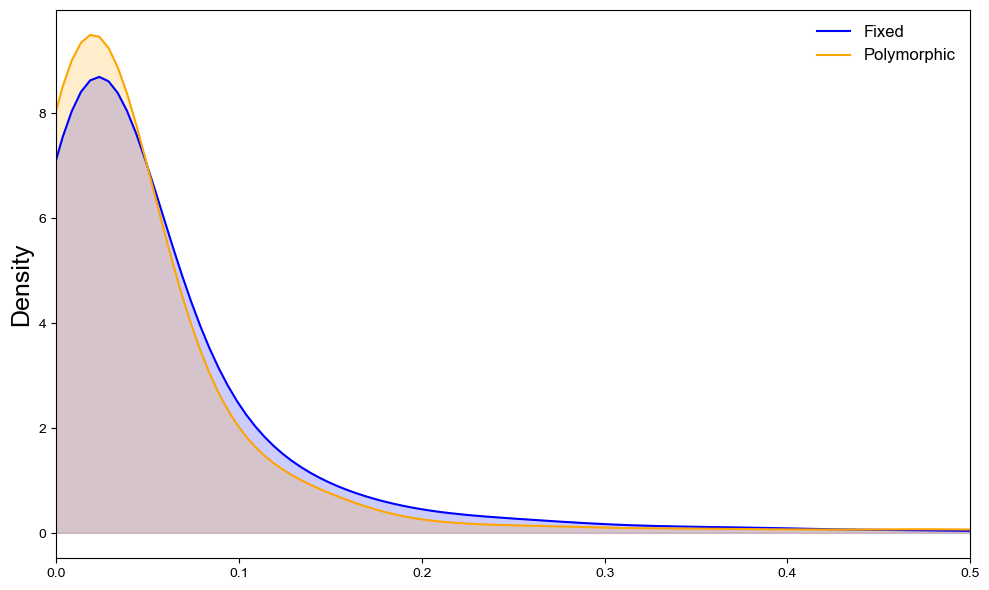

In [259]:
#Enrichment for Rxra gets even stronger at 550, 600
#Lack of shift in PhyloP is not consistent with this being due to differences in BGS
v2 = pd.read_csv("TF_Data/MA1531.1_NR1D1_400_ITL23_Fixed.csv.gz")
vv2 = pd.read_csv("TF_Data/MA1531.1_NR1D1_400_ITL23_Poly.csv.gz")
v2 = v2[(v2["1"] > 500) | ((v2["2"] > 500) & (v2["4"] > 500))]
vv2 = vv2[(vv2["1"] > 500) | ((vv2["2"] > 500) & (vv2["3"] > 500))]

be = list(pd.read_csv("BlacklistTE_Variants.txt")["Position"])
v2 = v2[~v2["Position"].isin(be)]
vv2 = vv2[~vv2["Position"].isin(be)]


#v2 = v2[v2["abs logfc"] > 0.25]
#vv2 = vv2[vv2["abs logfc"] > 0.25]

#v2 = v2[v2["SpecSup447"] > 250]
#vv2 = vv2[vv2["SpecSup447"] > 250]

vv2 = vv2[vv2["Human ref"] != vv2["Chimp ref"]]
vvv = prepare_alpha(v2, vv2, stat = "abs logfc")
#vvv["PhyloP"] = -vvv["PhyloP"]
alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = 0.08)
print(alpha)
print(fisher_exact(alpha[-2]))

In [260]:
from scipy.stats import binomtest
v2["Dif"] = v2["1"] - v2["2"]
vv2["Dif"] = vv2["1"] - vv2["2"]

vv2_ref = vv2[vv2["Human ref"] == vv2["Chimp ref"]]
vv2_alt = vv2[vv2["Human alt"] == vv2["Chimp ref"]]
vv2_ref["fixed logfc"] = -vv2_ref["logfc"].astype(float)
vv2_alt["fixed logfc"] = vv2_alt["logfc"].astype(float)
vv2 = pd.concat([vv2_ref, vv2_alt])

up = v2[v2["logfc"] > 0.1].shape[0]
down = v2[v2["logfc"] < -0.1].shape[0]
up_poly = vv2[vv2["fixed logfc"] > 0.1].shape[0]
down_poly = vv2[vv2["fixed logfc"] < -0.1].shape[0]
#print(binomtest(up, up + down, p = up_poly/(up_poly + down_poly)), up_poly/(up_poly + down_poly))
print(fisher_exact([[up, down], [up_poly, down_poly]]))

SignificanceResult(statistic=1.3453469607315762, pvalue=0.23069594948871402)


SignificanceResult(statistic=1.0960506398789047, pvalue=0.637336578832243)
SignificanceResult(statistic=0.309499819159612, pvalue=1.4968292345339387e-157)


<Axes: xlabel='Dif', ylabel='logfc'>

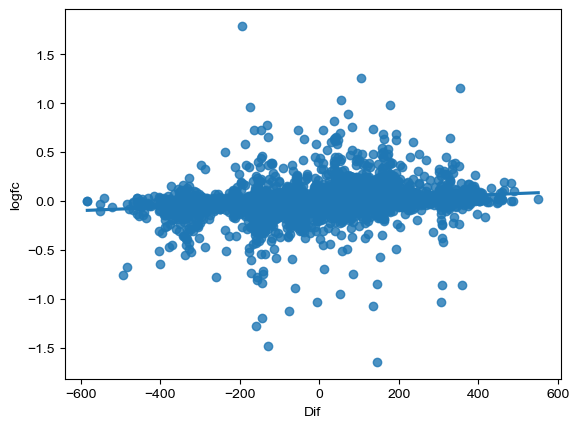

In [261]:
from scipy.stats import binomtest
v2["Dif"] = v2["1"] - v2["2"]
vv2["Dif"] = vv2["1"] - vv2["2"]

up = v2[v2["Dif"] > 200].shape[0]
down = v2[v2["Dif"] < -200].shape[0]
up_poly = vv2[vv2["Dif"] > 200].shape[0]
down_poly = vv2[vv2["Dif"] < -200].shape[0]
#print(binomtest(up, up + down, p = up_poly/(up_poly + down_poly)), up_poly/(up_poly + down_poly))
print(fisher_exact([[up, down], [up_poly, down_poly]]))
from scipy.stats import spearmanr
print(spearmanr(v2["Dif"], v2["logfc"]))
sns.regplot(x=v2["Dif"], y=v2["logfc"])

In [263]:
#v2 = v2[(v2["allele1_pred_counts"] > 350) | (v2["allele1_pred_counts"] > 350)]
v2_fore = v2[v2["abs logfc"] > 0.1]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]
v2_fore.to_csv("NR1D1_AbsG0.1_Fixed_ITL23_FilterNewTEs.bed", sep = "\t", header = None, index = None)

v2["Chrom"] = [x.split(":")[0] for x in v2["Position"]]
v2["Pos1"] = [int(x.split(":")[1]) for x in v2["Position"]]
v2["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2["Position"]]

#Set to 0.05 for MEF2A
v2_back = pd.concat([v2_fore, v2[v2["abs logfc"] < 0.025]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("NR1D1_AbsG0.1_Fixed_Background_New_ITL23_FilterNewTEs.bed", sep = "\t", header = None, index = None)

vv2["Chrom"] = [x.split(":")[0] for x in vv2["Position"]]
vv2["Pos1"] = [int(x.split(":")[1]) for x in vv2["Position"]]
vv2["Pos2"] = [int(x.split(":")[1]) + 1 for x in vv2["Position"]]
v2_back = pd.concat([v2_fore, vv2])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("NR1D1_AbsG0.1_Fixed_Background_Poly_ITL23_FilterNewTEs.bed", sep = "\t", header = None, index = None)

C:\Users\astar\AppData\Local\Temp\ipykernel_21676\2045998713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_21676\2045998713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_21676\2045998713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [226]:
syngo = list(pd.read_csv("../Cell_Type_Prop/Cell_Type_Prop/SYNGO.txt", sep = "\t", header = None)[0])

In [75]:
v2

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
7,chr1:944978,chr1:944978,SAMD11,2862,-0.607,0.0,314,-0.003491,3551.47360,3542.89010,0.003491,chr1:944978,544.0,609.0,598.0,Fixed,.,.
8,chr1:947997,chr1:947997,SAMD11,5881,-1.103,0.0,219,0.014307,295.54090,298.48640,0.014307,chr1:947997,510.0,375.0,326.0,Fixed,.,.
10,chr1:948639,chr1:948639,SAMD11,6523,-3.246,0.0,189,-0.003921,254.01277,253.32333,0.003921,chr1:948639,555.0,547.0,547.0,Fixed,.,.
11,chr1:948785,chr1:948785,SAMD11,6669,-0.039,0.0,355,0.006622,260.88678,262.08698,0.006622,chr1:948785,510.0,340.0,479.0,Fixed,.,.
18,chr1:1160402,chr1:1160402,TTLL10,13480,-2.173,0.0,187,-0.289101,404.34354,330.91962,0.289101,chr1:1160402,519.0,406.0,406.0,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152644,chrX:154303675,chrX:154303675,TKTL1,7879,-3.662,0.0,266,-0.288609,796.56116,652.13770,0.288609,chrX:154303675,552.0,617.0,617.0,Fixed,.,.
152645,chrX:154316010,chrX:154316010,TKTL1,20214,0.035,0.0,310,0.167480,277.28113,311.41310,0.167480,chrX:154316010,469.0,513.0,513.0,Fixed,.,.
152646,chrX:154332244,chrX:154332244,TKTL1,36448,-0.517,0.0,249,0.221060,782.37550,911.92896,0.221060,chrX:154332244,585.0,662.0,662.0,Fixed,.,.
152668,chrX:154763146,chrX:154763146,DKC1,0,-2.720,0.0,404,-0.032345,22353.95700,21858.36100,0.032345,chrX:154763146,614.0,552.0,552.0,Fixed,.,.


(0.0, 2000.0)

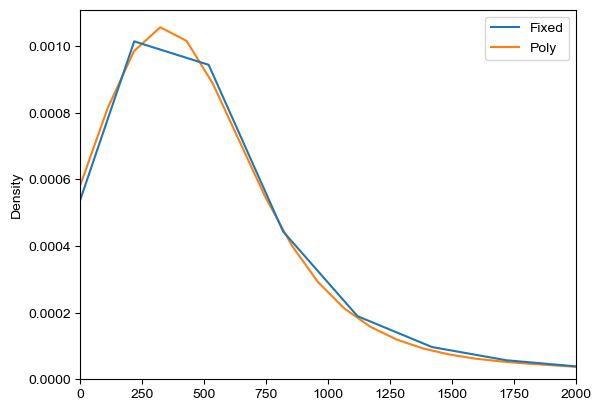

In [74]:
sns.kdeplot({"Fixed":list(v2["allele1_pred_counts"]), "Poly":list(vv2["allele1_pred_counts"])}, common_norm = False)
plt.xlim(0, 2000)

(0.15399451807715692, 0.3, [[2741, 17707], [217, 1657]], [[2741, 17707], [217, 1657]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.1820254376214567, pvalue=0.024942272941866378)
BinomTestResult(k=185, n=338, alternative='two-sided', statistic=0.5473372781065089, pvalue=0.8267862780576366)
BinomTestResult(k=38, n=60, alternative='two-sided', statistic=0.6333333333333333, pvalue=0.36199750541201015)
SignificanceResult(statistic=1.3234946871310507, pvalue=0.4327196804550997)


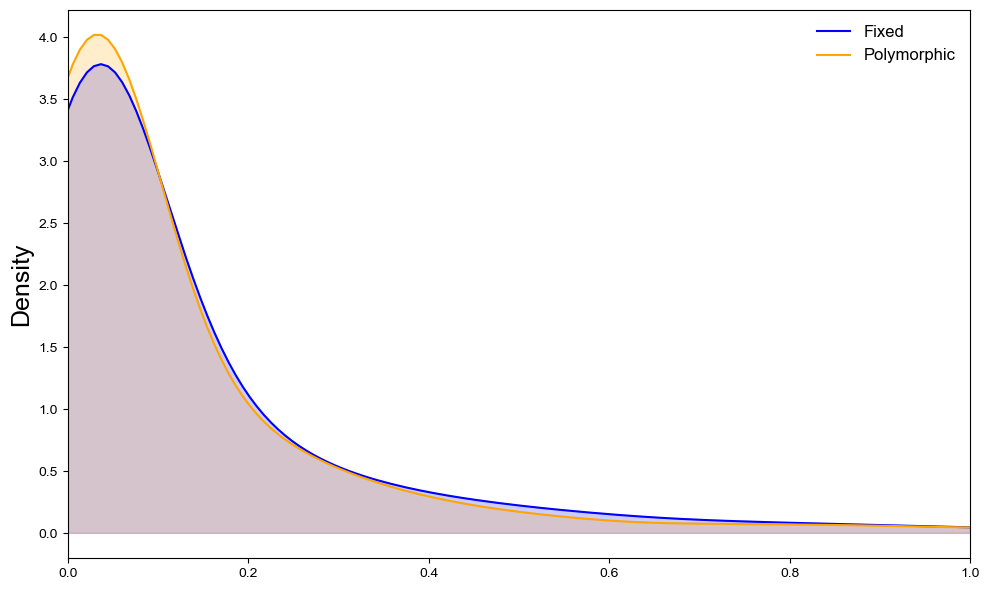

In [228]:
from scipy.stats import binomtest

#Reading in the NFIB data
#Can change to ASCT and get similar values
v2 = pd.read_csv("TF_Data/MA1643.1_NFIB_400_LiangSteinNeuron_Fixed.csv.gz")
vv2 = pd.read_csv("TF_Data/MA1643.1_NFIB_400_LiangSteinNeuron_Poly.csv.gz")
v2 = v2[v2["SpecSup447"] > 100]
vv2 = vv2[vv2["SpecSup447"] > 100]
v2 = v2[(v2["1"] > 500) | ((v2["2"] > 500) & (v2["4"] > 500))]
vv2 = vv2[(vv2["1"] > 500) | ((vv2["2"] > 500) & (vv2["3"] > 500))]

be = list(pd.read_csv("BlacklistTE_Variants.txt")["Position"])
v2 = v2[~v2["Position"].isin(be)]
vv2 = vv2[~vv2["Position"].isin(be)]

vv2 = vv2[vv2["Human ref"] != vv2["Chimp ref"]]
vvv = prepare_alpha(v2, vv2, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 1], cutoff = 0.3)
print(alpha)
print(fisher_exact(alpha[-2]))

#Get just the synaptic genes
v2_syn = v2[v2["NearestGene"].isin(syngo)]
v2_syn_big = v2_syn[v2_syn["abs logfc"] > 0.25]
v2_syn_small = v2_syn[v2_syn["abs logfc"] < 0.1]

#Get the DE genes from Rachel's paper
#Can change to humr and get similar values
#Can change to D100 and get similar values
ra = pd.read_csv("../Prime_DB_Expression/Agoglia_Fraser_2021/STAR/Hybrid_chpr/Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D150_chpr.txt", sep = "\t")

#Can change to 0.01 and get similar values
ra = ra[ra["padj"] < 0.05]

#Get synaptic genes with big effect sizes
v2_sbb = v2_syn_big[v2_syn_big["NearestGene"].isin(ra["Gene"])]

#Get all genes with big effect sizes
v2_big = v2[v2["abs logfc"] > 0.25]
v2_small = v2[v2["abs logfc"] < 0.1]
v2_bb = v2_big[v2_big["NearestGene"].isin(ra["Gene"])]
v2_sb = v2_small[v2_small["NearestGene"].isin(ra["Gene"])]

raaa = ra[ra["Gene"].isin(v2_bb["NearestGene"])]
down = raaa[raaa["log2FoldChange"] < 0].shape[0]
up = raaa[raaa["log2FoldChange"] > 0].shape[0]
down_back = ra[(ra["log2FoldChange"] < 0) & (ra["Gene"].isin(v2_sb["NearestGene"]))].shape[0]
up_back = ra[(ra["log2FoldChange"] > 0) & (ra["Gene"].isin(v2_sb["NearestGene"]))].shape[0]
#down_back = ra[(ra["log2FoldChange"] < 0)].shape[0]
#up_back = ra[(ra["log2FoldChange"] > 0)].shape[0]

#We don't find evidence for selection on NFIB targets when properly specifying the null model
print(binomtest(down, down + up, p = down_back/(down_back + up_back)))

#We don't find evidence for selection on synaptic NFIB targets when properly specifying the null model
raa = ra[ra["Gene"].isin(v2_sbb["NearestGene"])]
down = raa[raa["log2FoldChange"] < 0].shape[0]
up = raa[raa["log2FoldChange"] > 0].shape[0]
down_back = ra[(ra["log2FoldChange"] < 0) & (ra["Gene"].isin(v2_syn_small["NearestGene"]))].shape[0]
up_back = ra[(ra["log2FoldChange"] > 0) & (ra["Gene"].isin(v2_syn_small["NearestGene"]))].shape[0]

print(binomtest(down, down + up, p = down_back/(down_back + up_back)))
print(fisher_exact([[down, up], [down_back, up_back]]))

In [38]:
binomtest(26, 39)

BinomTestResult(k=26, n=39, alternative='two-sided', statistic=0.6666666666666666, pvalue=0.05325191409792752)

In [15]:
v2_bb

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
17,chr1:1526161,chr1:1526161,ATAD3A,13812,-0.425,0.000,77,0.008135,672.50620,676.30910,0.008135,chr1:1526161,615.0,496.0,496.0,Fixed,.,.
35,chr1:1762221,chr1:1762221,NADK,17017,-4.910,0.000,414,-0.023885,650.96387,640.27545,0.023885,chr1:1762221,506.0,480.0,480.0,Fixed,.,.
100,chr1:2847248,chr1:2847248,TTC34,45555,-1.136,0.000,215,-0.203323,872.25696,757.59680,0.203323,chr1:2847248,361.0,624.0,624.0,Fixed,.,.
184,chr1:3786370,chr1:3786370,LRRC47,2288,-1.523,0.000,202,0.019664,697.47095,707.04260,0.019664,chr1:3786370,526.0,570.0,570.0,Fixed,.,.
370,chr1:6286294,chr1:6286294,GPR153,25252,0.296,0.003,182,-0.209739,1045.81020,904.30520,0.209739,chr1:6286294,373.0,546.0,546.0,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123024,chrX:153446982,chrX:153446982,HAUS7,23592,2.565,0.028,326,0.010322,1468.36380,1478.90700,0.010322,chrX:153446982,499.0,605.0,605.0,Fixed,.,.
123025,chrX:153453965,chrX:153453965,HAUS7,16609,-0.144,0.000,176,0.084158,457.02423,484.47708,0.084158,chrX:153453965,502.0,368.0,368.0,Fixed,.,.
123056,chrX:154427792,chrX:154427792,ATP6AP1,0,-1.229,0.000,189,0.016733,1029.84740,1041.86160,0.016733,chrX:154427792,512.0,382.0,380.0,Fixed,.,.
123061,chrX:154454011,chrX:154454011,PLXNA3,4271,-1.113,0.000,178,0.066117,212.06958,222.01456,0.066117,chrX:154454011,570.0,403.0,403.0,Fixed,.,.


In [11]:
#v2 = v2[(v2["allele1_pred_counts"] > 350) | (v2["allele1_pred_counts"] > 350)]
v2_fore = v2[v2["abs logfc"] > 0.25]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]
v2_fore.to_csv("NFIB_AbsG0.25_Fixed_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

v2["Chrom"] = [x.split(":")[0] for x in v2["Position"]]
v2["Pos1"] = [int(x.split(":")[1]) for x in v2["Position"]]
v2["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2["Position"]]

#Set to 0.05 for MEF2A
v2_back = pd.concat([v2_fore, v2[v2["abs logfc"] < 0.1]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("NFIB_AbsG0.25_Fixed_Background_New_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

vv2["Chrom"] = [x.split(":")[0] for x in vv2["Position"]]
vv2["Pos1"] = [int(x.split(":")[1]) for x in vv2["Position"]]
vv2["Pos2"] = [int(x.split(":")[1]) + 1 for x in vv2["Position"]]
v2_back = pd.concat([v2_fore, vv2])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("NFIB_AbsG0.25_Fixed_Background_Poly_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

C:\Users\astar\AppData\Local\Temp\ipykernel_22452\2378122460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_22452\2378122460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_22452\2378122460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

(0.19052552239106868, 0.1, [[4028, 15559], [320, 1527]], [[4028, 15559], [320, 1527]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.235369400347066, pvalue=0.0008645257583203093)
BinomTestResult(k=683, n=1260, alternative='two-sided', statistic=0.542063492063492, pvalue=0.011195534822054562)
BinomTestResult(k=7, n=15, alternative='two-sided', statistic=0.4666666666666667, pvalue=0.801457222297447)


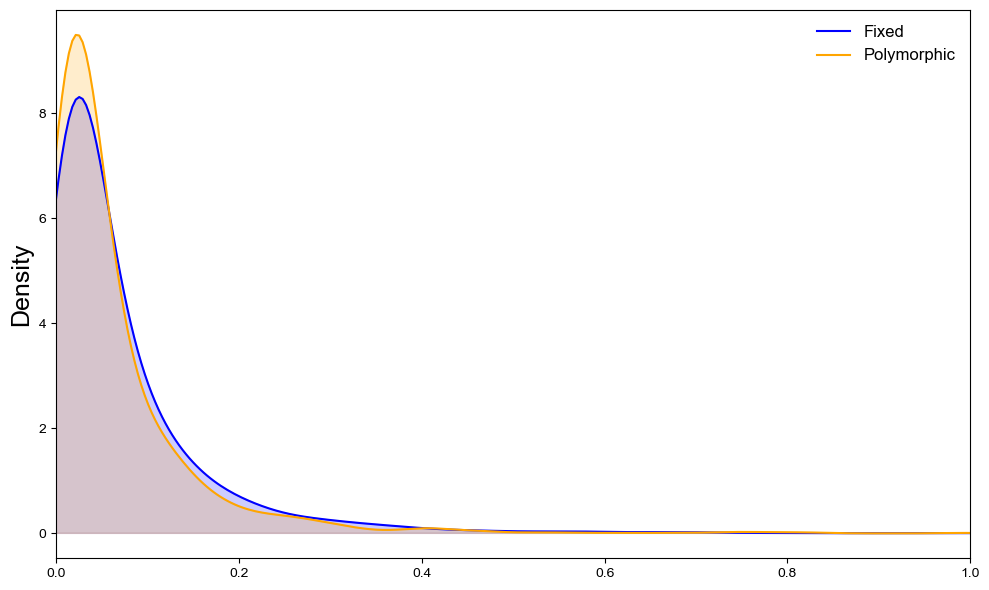

In [14]:
from scipy.stats import binomtest

#Reading in the NFIB data
#Can change to ASCT and get similar values
v2 = pd.read_csv("TF_Data/MA0745.2_SNAI2_400_FetalChondrocytes_Fixed.csv.gz")
vv2 = pd.read_csv("TF_Data/MA0745.2_SNAI2_400_FetalChondrocytes_Poly.csv.gz")
v2 = v2[(v2["1"] > 500) | ((v2["2"] > 500) & (v2["4"] > 500))]
vv2 = vv2[(vv2["1"] > 500) | ((vv2["2"] > 500) & (vv2["3"] > 500))]

be = list(pd.read_csv("BlacklistTE_Variants.txt")["Position"])
v2 = v2[~v2["Position"].isin(be)]
vv2 = vv2[~vv2["Position"].isin(be)]

vv2 = vv2[vv2["Human ref"] != vv2["Chimp ref"]]
vvv = prepare_alpha(v2, vv2, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 1], cutoff = 0.1)
print(alpha)
print(fisher_exact(alpha[-2]))

#Get just the synaptic genes
v2_syn = v2[v2["NearestGene"].isin(syngo)]
v2_syn_big = v2_syn[v2_syn["abs logfc"] > 0.25]

#Get the DE genes from Rachel's paper
#Can change to humr and get similar values
#Can change to D100 and get similar values
ra = pd.read_csv("../Prime_DB_Expression/Agoglia_Fraser_2021/STAR/Hybrid_chpr/Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D150_chpr.txt", sep = "\t")

#Can change to 0.01 and get similar values
ra = ra[ra["padj"] < 0.05]

#Get synaptic genes with big effect sizes
v2_sbb = v2_syn_big[v2_syn_big["NearestGene"].isin(ra["Gene"])]

#Get all genes with big effect sizes
v2_big = v2[v2["abs logfc"] > 0.25]
v2_bb = v2[v2["NearestGene"].isin(ra["Gene"])]

raaa = ra[ra["Gene"].isin(v2_bb["NearestGene"])]
down = raaa[raaa["log2FoldChange"] < 0].shape[0]
up = raaa[raaa["log2FoldChange"] > 0].shape[0]
down_back = ra[ra["log2FoldChange"] < 0].shape[0]
up_back = ra[ra["log2FoldChange"] > 0].shape[0]

#Evidence for selection on NFIB targets
print(binomtest(down, down + up, p = down_back/(down_back + up_back)))

#Evidence for selection on synaptic NFIB targets
raa = ra[ra["Gene"].isin(v2_sbb["NearestGene"])]
down = raa[raa["log2FoldChange"] < 0].shape[0]
up = raa[raa["log2FoldChange"] > 0].shape[0]
down_back = ra[ra["log2FoldChange"] < 0].shape[0]
up_back = ra[ra["log2FoldChange"] > 0].shape[0]

print(binomtest(down, down + up, p = down_back/(down_back + up_back)))


In [121]:
v = pd.read_csv("Fixed_LiangSteinProgenitor.txt", sep = "\t")


In [120]:
x = pd.read_csv("PVALB_CDH13_HumanDerived.txt", sep = "\t", header = None)
x["Pos1"] = [int(i.split(":")[1]) for i in x[0]]
x = x[x["Pos1"].isin(range(82000000, 84000000))]
#x = x[np.abs(x[3]) > 0.25]
x = x.set_index(0)

In [134]:
from collections import Counter
pvalb = v[v["Position"].isin(x.index)].set_index("Position").join(x)
pvalb = pvalb.sort_values(2)
pvalb[np.abs(pvalb[3]) > 0.1].tail(50)

,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,1,2,3,4,Pos1
Position,,,,,,,,,,,,,,,
chr16:82824543,chr16:82824543,CDH13,197540,-0.113,0.000,401,0.040581,343.44400,353.24164,0.040581,414.51172,458.04077,0.144063,0.048924,82824543
chr16:83586329,chr16:83586329,HSBP1,221651,-2.128,0.000,425,0.002779,586.42786,587.55860,0.002779,510.07242,458.10324,-0.155029,0.021030,83586329
chr16:83351067,chr16:83351067,HSBP1,456913,-0.691,0.000,362,-0.002090,276.96564,276.56473,0.002090,420.88490,458.50300,0.123505,0.039316,83351067
chr16:83624084,chr16:83624084,HSBP1,183896,-4.574,0.000,397,0.147184,555.54230,615.21075,0.147184,393.71973,459.27643,0.222194,0.031654,83624084
chr16:82729097,chr16:82729097,CDH13,102094,0.107,0.114,191,-0.017868,274.33746,270.96070,0.017868,401.22300,464.51605,0.211324,0.030590,82729097
chr16:83631216,chr16:83631216,HSBP1,176764,1.583,0.762,430,0.105143,533.25116,573.56570,0.105143,435.87225,468.14062,0.103037,0.018988,83631216
chr16:83808806,chr16:83808806,HSBP1,0,-1.544,0.000,390,0.102652,1024.29400,1099.83130,0.102652,439.39000,472.22064,0.103959,0.015938,83808806
chr16:83625024,chr16:83625024,HSBP1,182956,-4.264,0.000,184,0.166679,1116.61330,1253.36700,0.166679,414.17970,473.50696,0.193129,0.014940,83625024
chr16:83995739,chr16:83995739,NECAB2,27067,-2.149,0.000,344,-0.019624,1045.59410,1031.46780,0.019624,515.84650,477.55963,-0.111261,0.011722,83995739


In [107]:
v2_sbb_down = v2_sbb[v2_sbb["NearestGene"].isin(raa[raa["log2FoldChange"] < 0]["Gene"])]
v2_sbb_down = v2_sbb_down[np.sign(v2_sbb_down["logfc"]) != np.sign(v2_sbb_down["Dif"])]
v2_sbb_down = v2_sbb_down[v2_sbb_down["logfc"] > 0]
v2_sbb_down = v2_sbb_down[(v2_sbb_down["allele1_pred_counts"] > 1000) | (v2_sbb_down["allele2_pred_counts"] > 1000)]
v2_sbb_down

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Dif
732,chr1:7428303,chr1:7428303,VAMP3,343005,-3.113,0.000,224,0.511527,712.67676,1015.9620,0.511527,chr1:7428303,406.0,605.0,605.0,Fixed,.,.,-199.0
11374,chr1:228067149,chr1:228067149,ARF1,15765,-0.288,0.000,284,0.271596,1137.90060,1373.6084,0.271596,chr1:228067149,401.0,524.0,524.0,Fixed,.,.,-123.0
16430,chr10:71382396,chr10:71382396,CDH23,14537,0.442,0.000,242,0.698839,972.53076,1578.6100,0.698839,chr10:71382396,367.0,548.0,548.0,Fixed,.,.,-181.0
49841,chr16:10067542,chr16:10067542,GRIN2A,115097,-2.065,0.000,388,0.413412,1085.22880,1445.3420,0.413412,chr16:10067542,427.0,546.0,545.0,Fixed,.,.,-119.0
53716,chr16:82708266,chr16:82708266,CDH13,81263,1.466,0.000,292,0.358465,788.89830,1011.4161,0.358465,chr16:82708266,507.0,509.0,509.0,Fixed,.,.,-2.0
56709,chr17:33871150,chr17:33871150,ASIC2,286144,-0.816,0.000,267,0.467566,1248.10780,1725.8520,0.467566,chr17:33871150,410.0,524.0,524.0,Fixed,.,.,-114.0
56711,chr17:33893145,chr17:33893145,ASIC2,264149,1.776,0.998,294,0.941042,1246.39140,2392.9650,0.941042,chr17:33893145,454.0,509.0,509.0,Fixed,.,.,-55.0
130683,chr7:91421788,chr7:91421788,FZD1,157266,0.861,0.002,431,0.560925,1130.19920,1667.2861,0.560925,chr7:91421788,525.0,525.0,525.0,Fixed,.,.,0.0
132476,chr7:132428725,chr7:132428725,PLXNA4,148181,-0.025,0.000,440,0.624388,2065.59520,3184.2330,0.624388,chr7:132428725,444.0,540.0,540.0,Fixed,.,.,-96.0


In [90]:
v2_sbb["Dif"] = v2_sbb["1"] - v2_sbb["2"]
v2_sbb[v2_sbb["NearestGene"].isin(["NTRK2"])]

C:\Users\astar\AppData\Local\Temp\ipykernel_8896\523662039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_sbb["Dif"] = v2_sbb["1"] - v2_sbb["2"]


,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Dif
144214,chr9:84859882,chr9:84859882,NTRK2,190110,3.492,1.0,426,0.672065,460.65344,733.9833,0.672065,chr9:84859882,488.0,737.0,737.0,Fixed,.,.,-249.0


In [73]:
v2_bb_lfc = v2_bb.sort_values("NearestDist", ascending = True).drop_duplicates("NearestGene").set_index("NearestGene").join(raaa.set_index("Gene"))
v2_sbb_lfc = v2_sbb.sort_values("NearestDist", ascending = True).drop_duplicates("NearestGene").set_index("NearestGene").join(raaa.set_index("Gene"))

<Axes: xlabel='logfc', ylabel='log2FoldChange'>

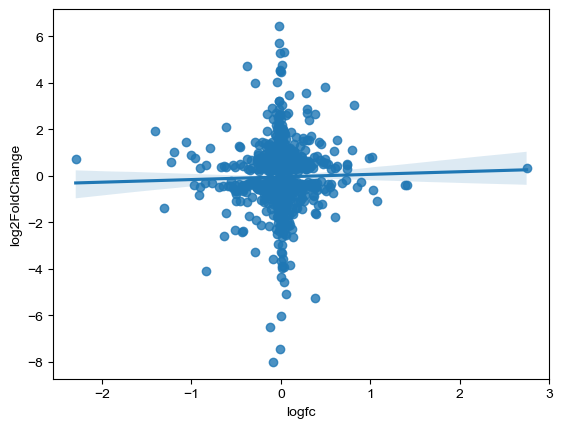

In [75]:
from scipy.stats import pearsonr,spearmanr
sns.regplot(x=v2_bb_lfc["logfc"], y=v2_bb_lfc["log2FoldChange"])

In [41]:
raa = ra[ra["Gene"].isin(v2_bb["NearestGene"])]
raa[raa["log2FoldChange"] > 0].shape

(639, 5)

In [43]:
binomtest(751, 639 + 751, p = 1976/(1976+1929))

BinomTestResult(k=751, n=1390, alternative='two-sided', statistic=0.5402877697841727, pvalue=0.010813973448577041)

In [24]:
ra[ra["log2FoldChange"] > 0]

,Gene,log2FoldChange,pvalue,padj,padj_mine
0,A1BG,1.051072,7.891296e-04,0.007014,0.010240
14,AACSP1,0.220664,1.515462e-03,0.012031,0.017565
39,ABAT,0.440684,4.556319e-07,0.000011,0.000016
48,ABCA11P,0.722555,3.374016e-03,0.022707,0.033149
53,ABCA3,0.283184,4.853779e-03,0.030520,0.044556
...,...,...,...,...,...
57075,ZSCAN29,0.349410,8.483481e-03,0.046838,0.068379
57076,ZSCAN30,0.645559,1.023146e-05,0.000173,0.000253
57078,ZSCAN32,0.765823,5.334887e-06,0.000097,0.000141
57099,ZWILCH,0.798134,1.097858e-06,0.000023,0.000034


In [32]:
binomtest(26, 39)

BinomTestResult(k=26, n=39, alternative='two-sided', statistic=0.6666666666666666, pvalue=0.05325191409792752)

In [25]:
from scipy.stats import binomtest
binomtest(38, (38 + 22), p = 1976/(1976+1929))

BinomTestResult(k=38, n=60, alternative='two-sided', statistic=0.6333333333333333, pvalue=0.05290822268834041)

In [15]:
v2_sbb.sort_values("PhyloP")

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
732,chr1:7428303,chr1:7428303,VAMP3,343005,-3.113,0.000,224,0.511527,712.67676,1015.96200,0.511527,chr1:7428303,406.0,605.0,605.0,Fixed,.,.
4100,chr1:44482040,chr1:44482040,RNF220,58051,0.640,0.000,424,0.349858,260.34290,331.79022,0.349858,chr1:44482040,374.0,526.0,526.0,Fixed,.,.
5364,chr1:67824987,chr1:67824987,GNG12,8448,1.318,0.999,421,-0.269871,449.88922,373.13525,0.269871,chr1:67824987,645.0,629.0,629.0,Fixed,.,.
10235,chr1:206457931,chr1:206457931,SRGAP2,5457,0.680,0.002,435,-0.631897,958.18770,618.34470,0.631897,chr1:206457931,576.0,386.0,386.0,Fixed,.,.
11105,chr1:223774415,chr1:223774415,CAPN2,61849,-0.521,0.000,216,0.603558,365.36000,555.14950,0.603558,chr1:223774415,366.0,513.0,513.0,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135969,chr8:27603405,chr8:27603405,CLU,8323,0.270,0.000,413,-1.612742,5254.45070,1718.08060,1.612742,chr8:27603405,586.0,459.0,459.0,Fixed,.,.
141883,chr9:2356643,chr9:2356643,VLDLR,265139,-2.050,0.000,398,-0.315468,403.49670,324.24610,0.315468,chr9:2356643,535.0,493.0,492.0,Fixed,.,.
141900,chr9:2566108,chr9:2566108,VLDLR,55674,2.451,0.008,427,0.678558,520.59290,833.22925,0.678558,chr9:2566108,451.0,634.0,634.0,Fixed,.,.
144214,chr9:84859882,chr9:84859882,NTRK2,190110,3.492,1.000,426,0.672065,460.65344,733.98330,0.672065,chr9:84859882,488.0,737.0,737.0,Fixed,.,.


In [38]:

v2_bb

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
54,chr1:1694953,chr1:1694953,SLC35E2B,2278,-1.041,0.000,76,0.007833,279.08230,280.60165,0.007833,chr1:1694953,512.0,455.0,325.0,Fixed,.,.
59,chr1:1782297,chr1:1782297,NADK,3059,-0.861,0.000,187,0.145885,2160.81470,2390.74560,0.145885,chr1:1782297,420.0,551.0,553.0,Fixed,.,.
141,chr1:2809201,chr1:2809201,TTC34,7508,0.841,0.000,104,-0.087591,634.44130,597.06824,0.087591,chr1:2809201,528.0,571.0,511.0,Fixed,.,.
146,chr1:2827006,chr1:2827006,TTC34,25313,-4.285,0.000,203,0.085755,363.26453,385.51200,0.085755,chr1:2827006,518.0,348.0,405.0,Fixed,.,.
152,chr1:2847926,chr1:2847926,TTC34,46233,-2.495,0.000,165,0.014078,956.07470,965.44980,0.014078,chr1:2847926,528.0,543.0,543.0,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152520,chrX:151636564,chrX:151636564,PRRG3,58668,0.711,0.001,91,-0.006305,155.43958,154.76172,0.006305,chrX:151636564,525.0,541.0,541.0,Fixed,.,.
152521,chrX:151639258,chrX:151639258,PRRG3,55974,0.059,0.000,330,-0.027869,224.38438,220.09146,0.027869,chrX:151639258,566.0,507.0,507.0,Fixed,.,.
152568,chrX:152969752,chrX:152969752,PNMA5,24374,-0.582,0.000,365,0.329042,875.31305,1099.54960,0.329042,chrX:152969752,617.0,695.0,695.0,Fixed,.,.
152569,chrX:152969826,chrX:152969826,PNMA5,24300,0.240,0.000,289,-0.185822,804.60400,707.36584,0.185822,chrX:152969826,565.0,405.0,405.0,Fixed,.,.


,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
83,chr1:2029105,chr1:2029105,GABRD,9731,1.713,0.000,434,-0.303959,642.40796,520.36743,0.303959,chr1:2029105,613.0,479.0,479.0,Fixed,.,.
287,chr1:3630318,chr1:3630318,TPRG1L,5089,0.856,0.001,169,0.268853,659.10486,794.12230,0.268853,chr1:3630318,518.0,579.0,587.0,Fixed,.,.
732,chr1:7428303,chr1:7428303,VAMP3,343005,-3.113,0.000,224,0.511527,712.67676,1015.96200,0.511527,chr1:7428303,406.0,605.0,605.0,Fixed,.,.
946,chr1:9753466,chr1:9753466,CLSTN1,70487,0.029,0.000,172,-1.043132,1098.75440,533.19580,1.043132,chr1:9753466,532.0,381.0,381.0,Fixed,.,.
1079,chr1:11237577,chr1:11237577,MTOR,24953,-2.131,0.000,427,0.598926,675.37134,1022.90955,0.598926,chr1:11237577,399.0,648.0,560.0,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149529,chrX:42537104,chrX:42537104,CASK,613591,-0.980,0.000,308,0.407545,726.50793,963.65967,0.407545,chrX:42537104,379.0,530.0,529.0,Fixed,.,.
149866,chrX:53290088,chrX:53290088,IQSEC2,8509,1.662,1.000,417,0.412969,1441.03690,1918.63010,0.412969,chrX:53290088,481.0,553.0,553.0,Fixed,.,.
150182,chrX:68259189,chrX:68259189,OPHN1,174471,-2.680,0.000,307,-0.355191,496.18817,387.90320,0.355191,chrX:68259189,583.0,418.0,418.0,Fixed,.,.
152374,chrX:147651932,chrX:147651932,FMR1,260006,0.827,0.000,264,-0.262310,417.19992,347.84120,0.262310,chrX:147651932,568.0,505.0,505.0,Fixed,.,.


In [164]:
vv2[vv2["NearestGene"].isin(["GABRB3"])]

,Position,Position.1,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,Human ref,Human alt,...,UnfoldedMAF,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,3,FixedOrPoly
8547,chr15:26321207,chr15:26321207,0.44438,GABRB3,451854,-0.86,0.0,361,A,G,...,0.55562,0.818602,796.46704,1404.7261,0.818602,chr15:26321207,380.0,527.0,527.0,Polymorphic


<Axes: xlabel='Dif', ylabel='logfc'>

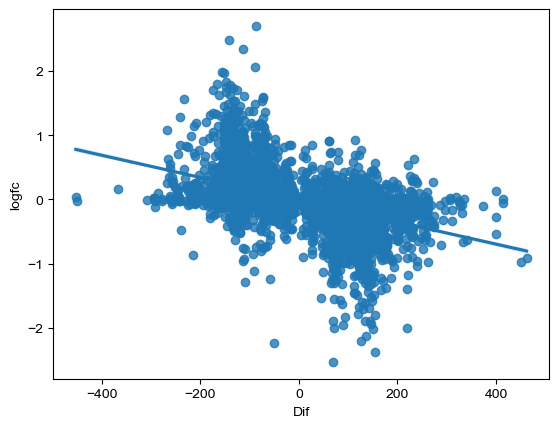

In [127]:
v2["Dif"] = v2["1"] - v2["2"]
sns.regplot(data = v2, x = "Dif", y = "logfc")

In [63]:
v2[v2["NearestGene"].isin(["CHST12"])]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Dif
126317,chr7:2400029,chr7:2400029,CHST12,3547,-0.054,0.0,301,-0.492845,1773.45680,1260.25790,0.492845,chr7:2400029,625.0,284.0,284.0,Fixed,.,.,341.0
126318,chr7:2400030,chr7:2400030,CHST12,3546,-0.416,0.0,301,-0.375853,1772.47850,1365.96010,0.375853,chr7:2400030,625.0,284.0,284.0,Fixed,.,.,341.0
126319,chr7:2400260,chr7:2400260,CHST12,3316,-0.093,0.0,381,-0.288796,1995.55320,1633.53030,0.288796,chr7:2400260,524.0,284.0,284.0,Fixed,.,.,240.0
126324,chr7:2418733,chr7:2418733,CHST12,15157,-0.343,0.0,335,-0.010211,2265.50320,2249.52600,0.010211,chr7:2418733,384.0,509.0,509.0,Fixed,.,.,-125.0
126327,chr7:2449377,chr7:2449377,CHST12,45801,-0.151,0.0,182,0.015642,599.33240,605.86597,0.015642,chr7:2449377,559.0,447.0,447.0,Fixed,.,.,112.0
126328,chr7:2451118,chr7:2451118,CHST12,47542,-2.870,0.0,187,0.008777,4517.52440,4545.09200,0.008777,chr7:2451118,536.0,419.0,419.0,Fixed,.,.,117.0
126329,chr7:2454684,chr7:2454684,CHST12,51108,-4.213,0.0,27,-0.024870,210.52435,206.92627,0.024870,chr7:2454684,517.0,200.0,495.0,Fixed,.,.,317.0
126331,chr7:2460510,chr7:2460510,CHST12,56934,-2.700,0.0,399,-0.041329,3161.16500,3071.89200,0.041329,chr7:2460510,569.0,547.0,547.0,Fixed,.,.,22.0


In [71]:
vv2.sort_values("abs logfc", ascending = False).to_csv("Bleh_Poly.csv")

In [119]:
v2k[v2k["NearestGene"].isin(x[x["Term"].isin(["Glutamate Receptor Activity (GO:0008066)"])]["Genes"].loc[534].split(";"))]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,...,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Chrom,Pos1,Pos2
17264,chr10:85651747,chr10:85651747,GRID1,715033,1.456,0.008,386,-0.472223,1150.75400,829.52440,...,chr10:85651747,505.0,437.0,437.0,Fixed,.,.,chr10,85651747,85651748
17283,chr10:86091672,chr10:86091672,GRID1,275108,0.610,0.638,94,0.431612,425.21970,573.51080,...,chr10:86091672,477.0,674.0,674.0,Fixed,.,.,chr10,86091672,86091673
26045,chr11:105596050,chr11:105596050,GRIA4,14752,0.005,0.002,231,-0.319155,339.25317,271.92470,...,chr11:105596050,507.0,338.0,338.0,Fixed,.,.,chr11,105596050,105596051
91555,chr3:6440622,chr3:6440622,GRM7,421325,0.583,0.002,191,0.942128,378.35156,726.94960,...,chr3:6440622,400.0,553.0,553.0,Fixed,.,.,chr3,6440622,6440623
91570,chr3:7160298,chr3:7160298,GRM7,298351,-0.477,0.000,364,0.446365,563.39980,767.69006,...,chr3:7160298,548.0,548.0,548.0,Fixed,.,.,chr3,7160298,7160299
91584,chr3:7431069,chr3:7431069,GRM7,569122,2.030,0.001,281,-0.282861,420.62793,345.73904,...,chr3:7431069,555.0,551.0,551.0,Fixed,.,.,chr3,7431069,7431070
94135,chr3:51730109,chr3:51730109,GRM2,23004,0.064,0.017,164,-0.455172,310.17267,226.24718,...,chr3:51730109,546.0,394.0,394.0,Fixed,.,.,chr3,51730109,51730110
105505,chr4:92647259,chr4:92647259,GRID2,343277,-0.131,0.003,185,0.592786,203.69543,307.20453,...,chr4:92647259,426.0,587.0,587.0,Fixed,.,.,chr4,92647259,92647260
107835,chr4:157358579,chr4:157358579,GRIA2,137826,-3.248,0.000,341,-0.681629,477.06046,297.42847,...,chr4:157358579,482.0,593.0,530.0,Fixed,.,.,chr4,157358579,157358580
107836,chr4:157516945,chr4:157516945,GRIA2,296192,-1.747,0.000,383,0.348920,190.06363,242.06640,...,chr4:157516945,416.0,506.0,506.0,Fixed,.,.,chr4,157516945,157516946


In [117]:
import gseapy as gs
x[x["Term"].isin(["Glutamate Receptor Activity (GO:0008066)"])]

,Term,Genes
534,Glutamate Receptor Activity (GO:0008066),GRIA2;GRID1;GRID2;GRIK3;GRIN2D;GRM2;GRM1;GRIN3...


In [118]:
len(x[x["Term"].isin(["Glutamate Receptor Activity (GO:0008066)"])]["Genes"].loc[534].split(";"))

16

In [115]:
v2k = v2[v2["abs logfc"] > 0.25]
x = pd.read_csv("../DPSC_CNCC/GOMF_AccelEvol_Input.txt", sep = "\t")
for index, row in x.iterrows():
    if "lutamat" in row["Term"]:
        print(row["Term"])

G Protein-Coupled Glutamate Receptor Binding (GO:0035256)
L-glutamate Transmembrane Transporter Activity (GO:0005313)
NMDA Glutamate Receptor Activity (GO:0004972)
Adenylate Cyclase Inhibiting G Protein-Coupled Glutamate Receptor Activity (GO:0001640)
Glutamate Receptor Activity (GO:0008066)
Glutamate Receptor Binding (GO:0035254)
Ionotropic Glutamate Receptor Activity (GO:0004970)
Ionotropic Glutamate Receptor Binding (GO:0035255)


In [136]:
v = pd.read_csv("NFIB_AbsG0.25_Fixed_LSN.bed", sep = "\t")
v

FileNotFoundError: [Errno 2] No such file or directory: 'NFIB_AbsG0.25_Fixed_LSN.txt'

In [189]:
v2_fore = v2[v2["abs logfc"] > 0.15]
v2_fore

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
113,chr1:7585113,chr1:7585113,VAMP3,186195,1.895,1.000,432,0.216688,844.86487,981.78580,0.216688,chr1:7585113,334.0,506.0,506.0,Fixed,.,.
171,chr1:9670366,chr1:9670366,PIK3CD,18612,0.681,0.000,406,0.277523,340.79105,413.07697,0.277523,chr1:9670366,373.0,550.0,550.0,Fixed,.,.
209,chr1:10986747,chr1:10986747,C1orf127,22511,1.076,0.000,411,-0.222245,709.19446,607.94305,0.222245,chr1:10986747,502.0,407.0,295.0,Fixed,.,.
215,chr1:11144099,chr1:11144099,EXOSC10,44245,0.123,0.000,411,-0.174297,1802.17130,1597.08240,0.174297,chr1:11144099,528.0,503.0,503.0,Fixed,.,.
319,chr1:16073966,chr1:16073966,FAM131C,0,3.161,0.034,395,-0.201046,5571.16600,4846.46630,0.201046,chr1:16073966,558.0,240.0,240.0,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86666,chrX:145414113,chrX:145414113,SPANXN1,166610,-0.040,0.000,403,0.150283,99.60271,110.53778,0.150283,chrX:145414113,360.0,539.0,539.0,Fixed,.,.
86755,chrX:148896778,chrX:148896778,AFF2,396051,0.757,0.000,286,-0.285771,89.08806,73.07919,0.285771,chrX:148896778,547.0,407.0,407.0,Fixed,.,.
86763,chrX:149094179,chrX:149094179,IDS,411102,0.034,0.002,171,0.370517,66.72073,86.25765,0.370517,chrX:149094179,395.0,527.0,527.0,Fixed,.,.
86802,chrX:151285234,chrX:151285234,GPR50,108649,-0.389,0.024,155,0.258074,41.08013,49.12695,0.258074,chrX:151285234,345.0,535.0,535.0,Fixed,.,.


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1342499647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1342499647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1342499647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
#v2 = v2[(v2["allele1_pred_counts"] > 350) | (v2["allele1_pred_counts"] > 350)]
v2_fore = v2[v2["logfc"] < -0.25]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]
v2_fore.to_csv("NFIB_LFCL-0.25_Fixed_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

v2["Chrom"] = [x.split(":")[0] for x in v2["Position"]]
v2["Pos1"] = [int(x.split(":")[1]) for x in v2["Position"]]
v2["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2["Position"]]
v2_back = pd.concat([v2_fore, v2[v2["logfc"] > -0.1]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("NFIB_LFCL-0.25_Fixed_Background_New_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

vv2["Chrom"] = [x.split(":")[0] for x in vv2["Position"]]
vv2["Pos1"] = [int(x.split(":")[1]) for x in vv2["Position"]]
vv2["Pos2"] = [int(x.split(":")[1]) + 1 for x in vv2["Position"]]
v2_back = pd.concat([v2_fore, vv2])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("NFIB_LFCL-0.25_Fixed_Background_Poly_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

C:\Users\astar\AppData\Local\Temp\ipykernel_22452\4174010005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_22452\4174010005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_22452\4174010005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [56]:
v2["Dif"] = v2["1"] - v2["2"]

v2k = v2[v2["abs logfc"] > 0.05]
v2k = v2k[(v2k["allele1_pred_counts"] > 1000) | (v2k["allele2_pred_counts"] > 1000)]
v2k.sort_values("Dif").tail(50).head(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,0,1,2,4,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Dif
122333,chr6:95630199,chr6:95630199,MANEA,52735,-1.144,0.000,406,-0.956005,1503.3586,774.95490,0.956005,chr6:95630199,510.0,315.0,314.0,Fixed,.,.,195.0
122334,chr6:95630200,chr6:95630200,MANEA,52736,-3.040,0.000,406,-0.386881,1501.3030,1148.16820,0.386881,chr6:95630200,510.0,315.0,314.0,Fixed,.,.,195.0
45367,chr15:51336285,chr15:51336285,CYP19A1,2313,-0.927,0.000,404,-0.837848,1209.8279,676.87160,0.837848,chr15:51336285,608.0,412.0,434.0,Fixed,.,.,196.0
44068,chr15:22831612,chr15:22831612,NIPA2,7128,-0.465,0.000,291,-0.953433,1528.7913,789.47130,0.953433,chr15:22831612,598.0,401.0,407.0,Fixed,.,.,197.0
68181,chr19:51079977,chr19:51079977,KLK14,2854,-0.014,0.000,295,0.149210,1072.9685,1189.88130,0.149210,chr19:51079977,890.0,692.0,692.0,Fixed,.,.,198.0
23748,chr11:63952609,chr11:63952609,NAA40,13688,0.119,0.079,156,-0.102317,1293.8030,1205.22390,0.102317,chr11:63952609,586.0,387.0,387.0,Fixed,.,.,199.0
52907,chr16:72921745,chr16:72921745,ZFHX3,137304,0.291,0.000,434,-0.935612,9244.4980,4833.21500,0.935612,chr16:72921745,684.0,485.0,485.0,Fixed,.,.,199.0
23786,chr11:64252075,chr11:64252075,PLCB3,0,1.701,0.001,405,-0.432034,1935.6592,1434.74150,0.432034,chr11:64252075,777.0,576.0,576.0,Fixed,.,.,201.0
130951,chr7:98949875,chr7:98949875,TRRAP,71354,-3.109,0.000,386,-1.309955,2092.3784,843.92600,1.309955,chr7:98949875,510.0,302.0,384.0,Fixed,.,.,208.0
81731,chr20:2559273,chr20:2559273,TMC2,0,0.200,0.000,395,-0.363681,2583.7947,2008.07100,0.363681,chr20:2559273,514.0,304.0,356.0,Fixed,.,.,210.0


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.2319377314669513, 0.05, [[89, 322], [38, 179]], [[89, 322], [38, 179]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.3019777705132396, pvalue=0.25069617145029177)


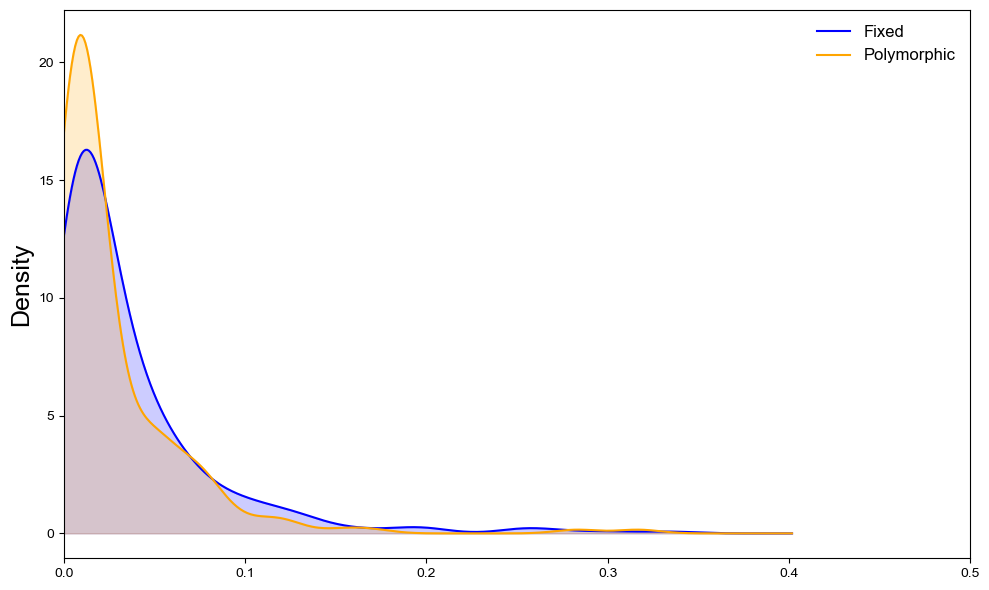

In [63]:
vvv = prepare_alpha(v[v["NearestGene"] == "WDR17"], vv[vv["NearestGene"] == "WDR17"], stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = 0.05)
print(alpha)
print(fisher_exact(alpha[-2]))

In [43]:
x = list(vv[vv["Chrom"]=="chrX"].sort_values("abs logfc")["abs logfc"])
x.sort()
x[25000]

0.0059465826

(0.054386245296763835,
 [0.07, 0.0059465826],
 [[41966, 92914], [10678, 25002]],
 [[41966, 92913], [10678, 25000]],
 <Figure size 1000x600 with 1 Axes>)

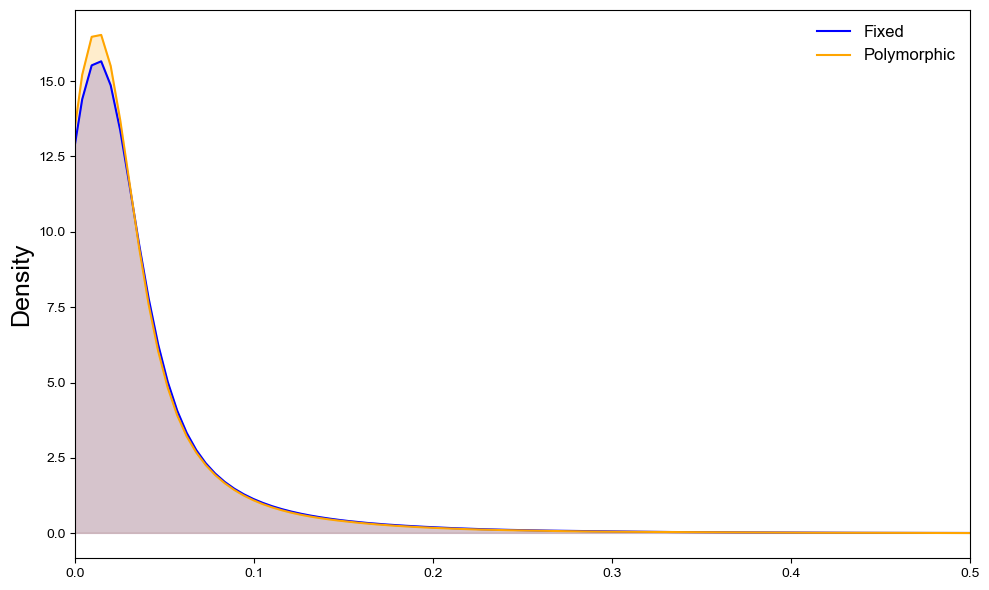

In [44]:
compute_alpha_cutoff2(vvv, plot = True, window = [0, 0.5], cutoff1 = 0.07, cutoff2 = 0.0059465826)

(0.03957706163641017,
 [0.05, 0.0059465826],
 [[63828, 92914], [16495, 25002]],
 [[63828, 92913], [16495, 25000]],
 <Figure size 1000x600 with 1 Axes>)

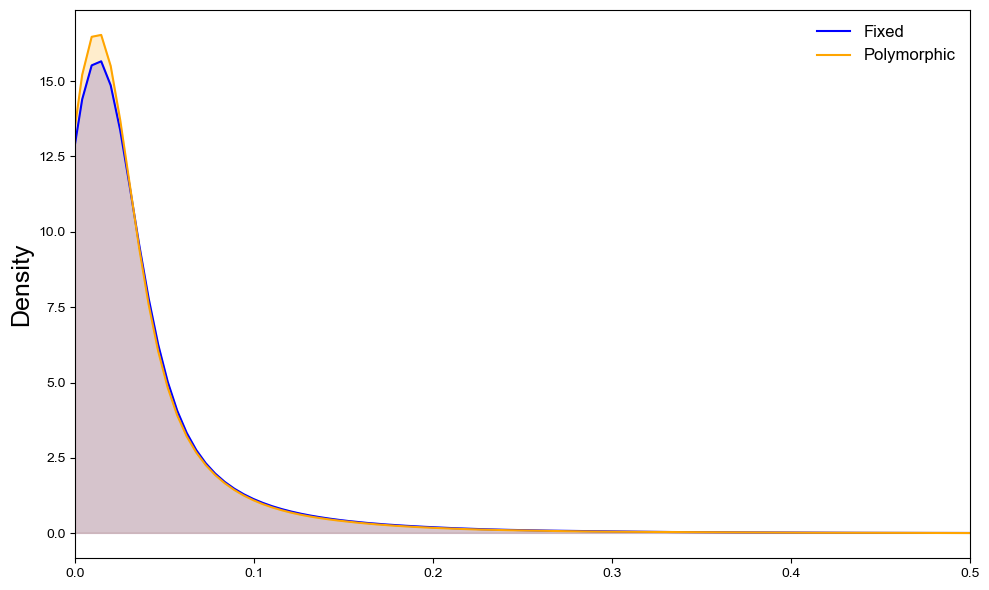

In [45]:
compute_alpha_cutoff2(vvv, plot = True, window = [0, 0.5], cutoff1 = 0.05, cutoff2 = 0.0059465826)